# Análise Exploratória

## Introdução

A análise abaixo foi feita utilizando dados ficticios criados por um código python de números aleatórios em larga escala.

Nossa motivação é enteder a respeito da popularidade de 3 diferentes itens em escalas regionais e temporais, e dessa forma, a partir dessa análise montar estratégias de marketing, com intuito de otimazar ao máximo o engajamento do produto em todas as circunstancias possíveis.

Como perguntas tentaremos responder:
- Existe alguma disparidade na venda dos produtos em diferentes regiõe?
- Existe uma diferença na venda dos produtos de acordo com as epocas do ano?
- Os produtos podem ser administrados de acordo com dos dias de venda ao longo da semana?



Fonte do datasete, própria.

## Tratamento dos dados

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:

#importando os dados 
dados = pd.read_csv('dados_vendas.csv')

In [5]:
#verificando os dados

print(dados.head())


         Data    Produto    Região       Valor
0  2023-01-01  Produto C  Região 4  169.180304
1  2023-01-02  Produto B  Região 4  254.710693
2  2023-01-03  Produto A  Região 4  379.619609
3  2023-01-04  Produto B  Região 3  653.672106
4  2023-01-05  Produto B  Região 3  771.022636


In [6]:
print(dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Data     365 non-null    object 
 1   Produto  365 non-null    object 
 2   Região   365 non-null    object 
 3   Valor    365 non-null    float64
dtypes: float64(1), object(3)
memory usage: 11.5+ KB
None


In [7]:
#tratando dados ausentes

dados.dropna(inplace=True) #remove as linhas com valores null , o parametro "inplace" esta como true por que as alterações devem ser feitas no proprio dataframe
dados.reset_index(drop=True, inplace= True) #reseta os indices após a remoção, o parametro "drop" esta como true por que o indice atual vai ser removido após a mudança 


In [8]:
#tratando os tipos de dados

dados['Data'] = pd.to_datetime(dados['Data']) #convertendo a coluna 'Data' de object para o tipo datetime



In [9]:
#verificando os dados após as alterações 

print(dados.head())

        Data    Produto    Região       Valor
0 2023-01-01  Produto C  Região 4  169.180304
1 2023-01-02  Produto B  Região 4  254.710693
2 2023-01-03  Produto A  Região 4  379.619609
3 2023-01-04  Produto B  Região 3  653.672106
4 2023-01-05  Produto B  Região 3  771.022636


In [10]:

print(dados.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Data     365 non-null    datetime64[ns]
 1   Produto  365 non-null    object        
 2   Região   365 non-null    object        
 3   Valor    365 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 11.5+ KB
None


## Análise dos dados

In [11]:
#Estatisticas basica dos dados

print(dados.describe())

                      Data       Valor
count                  365  365.000000
mean   2023-07-02 00:00:00  574.110462
min    2023-01-01 00:00:00  101.008531
25%    2023-04-02 00:00:00  366.136408
50%    2023-07-02 00:00:00  582.169021
75%    2023-10-01 00:00:00  809.310748
max    2023-12-31 00:00:00  997.319034
std                    NaN  257.759713


C:\Users\Darwin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Darwin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


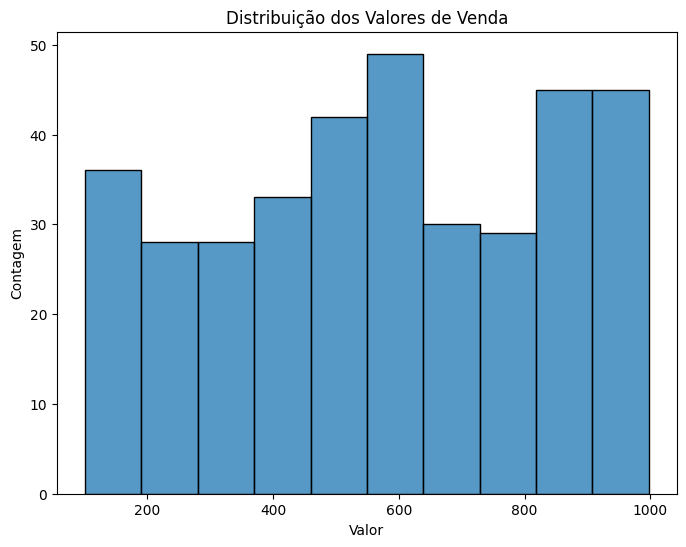

In [12]:
#visualização gráfica da destribuição dos valores de venda 

plt.figure(figsize=(8, 6))
sns.histplot(data=dados, x='Valor', bins=10)
plt.title('Distribuição dos Valores de Venda')
plt.xlabel('Valor')
plt.ylabel('Contagem')
plt.show()



In [13]:
# analise por produtos, Agrupei todos os dados da coluna 'Produto' e somei todos os valores.

produto_vendas =dados.groupby('Produto')['Valor'].sum()
print(produto_vendas)


Produto
Produto A    63958.733551
Produto B    70575.562153
Produto C    75016.023040
Name: Valor, dtype: float64


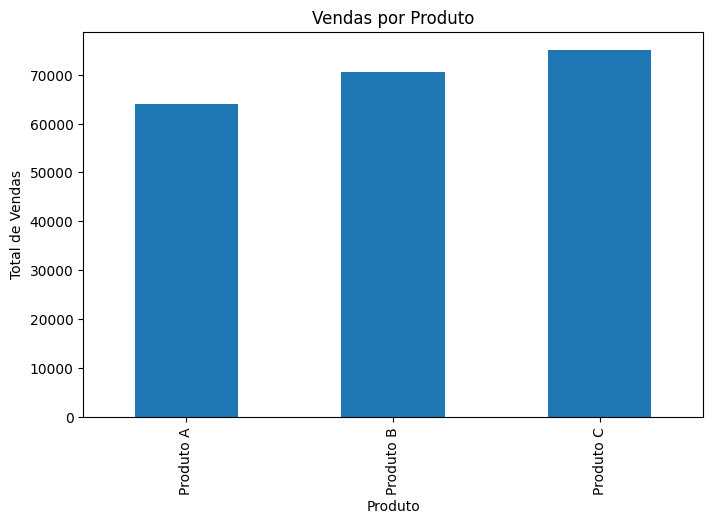

In [14]:
# Visualização da relação de vendas entre os produtos

plt.figure(figsize=(8,5))
produto_vendas.plot(kind='bar')
plt.title('Vendas por Produto')
plt.xlabel('Produto')
plt.ylabel('Total de Vendas')
plt.show()


## Estudos Temporais 

In [15]:
# Estudo temporal - vendas por mês 

# Converter a coluna para datetime já foi feito, então criei uma nova coluna 'Mês' no DataFrame
# que armazena o valor correspondente a cada mês extraido da coluna 'Data' através da função 'dt.month'.

dados['Mês'] = dados['Data'].dt.month
vendas_por_mes = dados.groupby('Mês')['Valor'].sum()

# Então agrupo os dados da coluna 'Mês' e calculo a soma dos valores da coluna 'Valor' para cada grupo de meses.
print(vendas_por_mes)

Mês
1     18494.484515
2     15240.062453
3     16101.253566
4     16730.522799
5     16772.279097
6     19181.511393
7     15119.096617
8     17879.706154
9     18385.497537
10    18415.802287
11    18096.241467
12    19133.860857
Name: Valor, dtype: float64


In [16]:
# Estudo temporal - vendas por semestre

#como fiz antes criei uma nova coluna chamada 'Semestre' e então utilizei a função '(dados['Data'].dt.month - 1) // 6 + 1'
# para calcular o numero de semestres, primeira subtrai por 1 para ajustar o intervalo dos peses de 1 a 12 para 0 a 11, para que o intervalo dos meus meses seja contado certo
# então faço a divisão por 6 para dividir os meses de 0 a 5 para o primeiro semestre e os de 6 a 11 para o segundo semestre, no final somo mais um para cocertar os semestres
# que estavam 0 e 1, para 1 e 2

dados['Semestre'] = (dados['Data'].dt.month -1) // 6 + 1
vendas_por_semestre = dados.groupby('Semestre')['Valor'].sum()

print(vendas_por_semestre)

Semestre
1    102520.113824
2    107030.204919
Name: Valor, dtype: float64


In [ ]:
dados['Semestre'] = (dados['Data'].dt.month) // 6 
vendas_por_semestre_teste = dados.groupby('Semestre')['Valor'].sum()

#se o mesmo codigo é executado sem as operações o computador interpreta como se existisse um mes 0 e acaba criando um terceiro semestre
# apenas para o mês 12, nesse caso o primeiro semeste esta com 1 mês a menos e o segundo com um mês a mais, já o terceiro é apenas um mês

print(vendas_por_semestre_teste)
print(vendas_por_semestre_teste)

Semestre
0     83338.602431
1    107077.855456
2     19133.860857
Name: Valor, dtype: float64


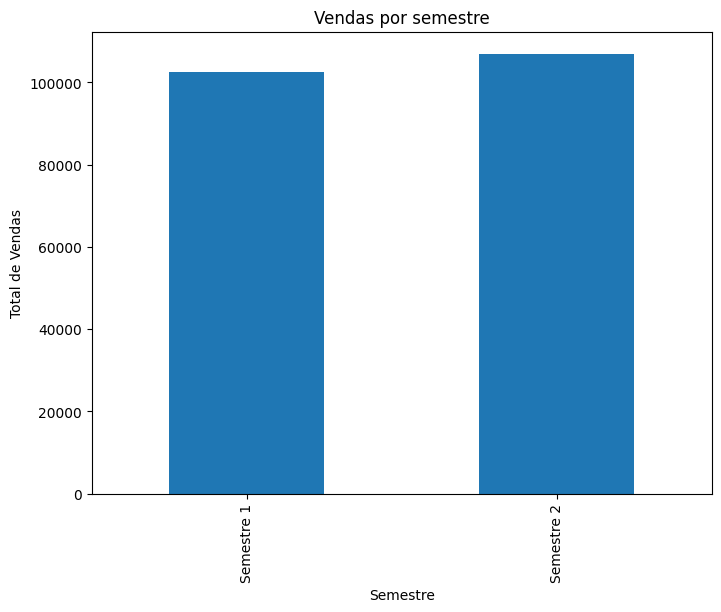

In [19]:
#Visualização do numero de vendas por semestre

plt.figure(figsize=(8,6))
vendas_por_semestre.plot(kind='bar')
plt.title('Vendas por semestre')
plt.xlabel('Semestre')
plt.ylabel('Total de Vendas')
plt.xticks(range(2), ['Semestre 1', 'Semestre 2'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

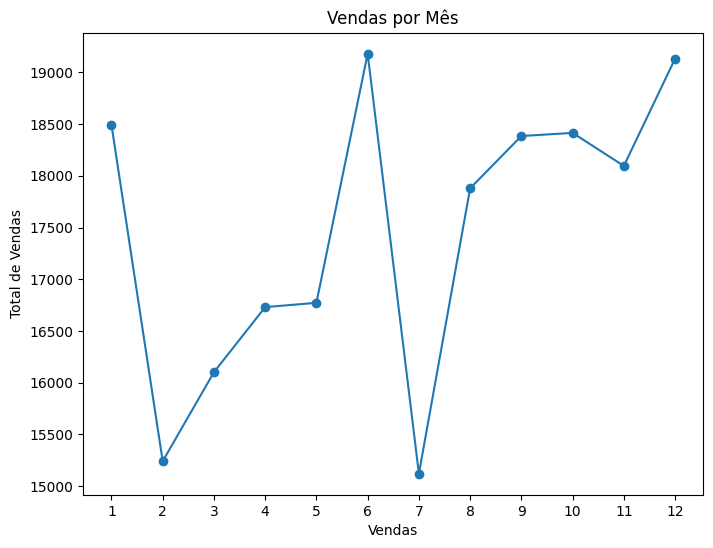

In [18]:
#Visualização do numero de vendas com relação aos meses

plt.figure(figsize=(8,6))
vendas_por_mes.plot(kind='line', marker='o')
plt.title('Vendas por Mês')
plt.xlabel('Vendas')
plt.ylabel('Total de Vendas')
plt.xticks(range(1,13)) #Utilizado para definir os rotulos do eixo x
plt.show

In [20]:
#Análise por Região, Agrupei os dados da coluna 'Região' e somei todos os valores 

regiao_vendas = dados.groupby('Região')['Valor'].sum()
print(regiao_vendas)


Região
Região 1    50983.568124
Região 2    50077.452104
Região 3    52961.936247
Região 4    55527.362268
Name: Valor, dtype: float64


## Vendas por Região

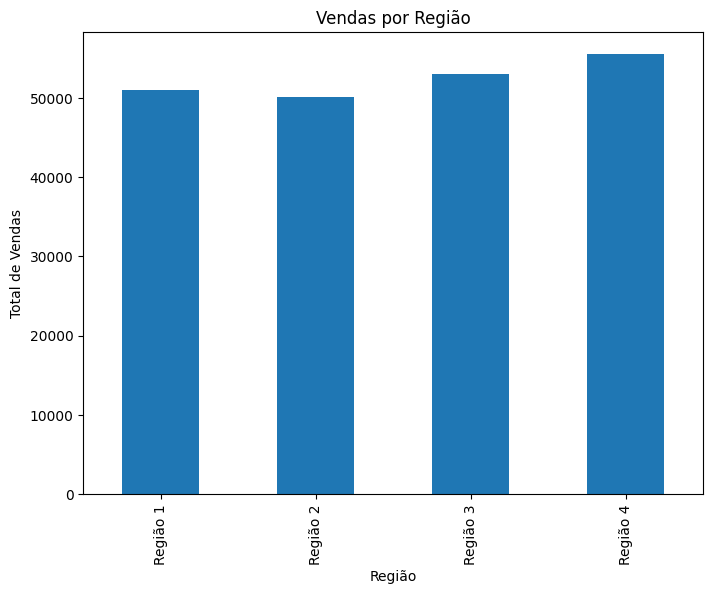

In [21]:
#Visualização da relação entre Regiaão e Vendas

plt.figure(figsize=(8,6))
regiao_vendas.plot(kind='bar')
plt.title('Vendas por Região')
plt.xlabel('Região')
plt.ylabel('Total de Vendas')
plt.show()

In [22]:
# Análise da relação entre produto e região

vendas_por_regiao_produto = dados.groupby(['Região', 'Produto'])['Valor'].sum().unstack()

In [23]:
paleta_cores = sns.color_palette('Set3', n_colors=len(vendas_por_regiao_produto.index))

#Visualização da relação entre produto e região

plt.figure(figsize=(10, 6))
vendas_por_regiao_produto.plot(kind='bar', color=paleta_cores)
plt.title('Vendas por Região e Produto')
plt.xlabel('Região e Produto')
plt.ylabel('Total de Vendas')
plt.legend(title='Região')
plt.show()

<Figure size 1000x600 with 0 Axes>

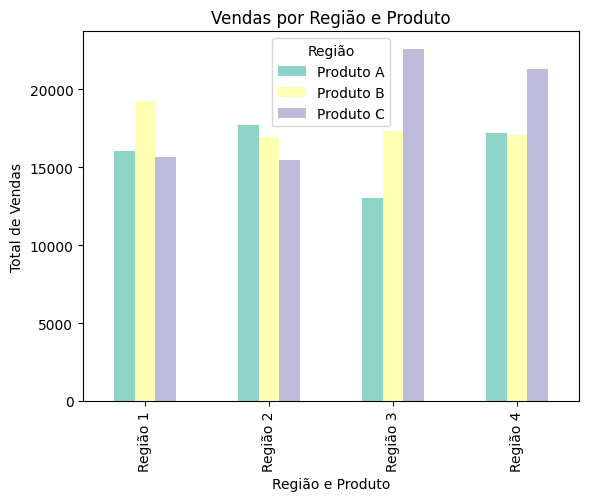

In [24]:
#Visualização da relação entre produto e região

plt.figure(figsize=(10, 6))
vendas_por_regiao_produto.plot(kind='bar', color=paleta_cores)
plt.title('Vendas por Região e Produto')
plt.xlabel('Região e Produto')
plt.ylabel('Total de Vendas')
plt.legend(title='Região')
plt.show()

In [25]:
# Análise Temporal e Regional
# Aproveitando da Coluna 'Mês' ja criada antes, agrupei os dados dela com o da região e somei os valores totais

vendas_por_mes_regiao = dados.groupby(['Mês', 'Região'])['Valor'].sum().unstack()
print(vendas_por_mes_regiao)


Região     Região 1     Região 2     Região 3     Região 4
Mês                                                       
1       3560.585452  3446.615429  7681.604151  3805.679482
2       2942.249677  5229.955307  4434.827890  2633.029579
3       4956.197759  2959.077966  3543.717085  4642.260755
4       5306.831647  3080.095539  4019.432339  4324.163274
5       3116.094003  5054.447383  2999.060196  5602.677515
6       4983.497618  5038.444338  4895.565653  4264.003784
7       3393.511839  3709.104704  2593.769185  5422.710889
8       5618.619802  4141.033736  1784.093253  6335.959363
9       5600.979419  3652.453245  4888.537749  4243.527125
10      3679.250667  5350.881121  4386.991950  4998.678549
11      4903.143930  2066.672724  7260.477004  3865.947808
12      2922.606310  6348.670612  4473.859791  5388.724144


C:\Users\Darwin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Darwin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Darwin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

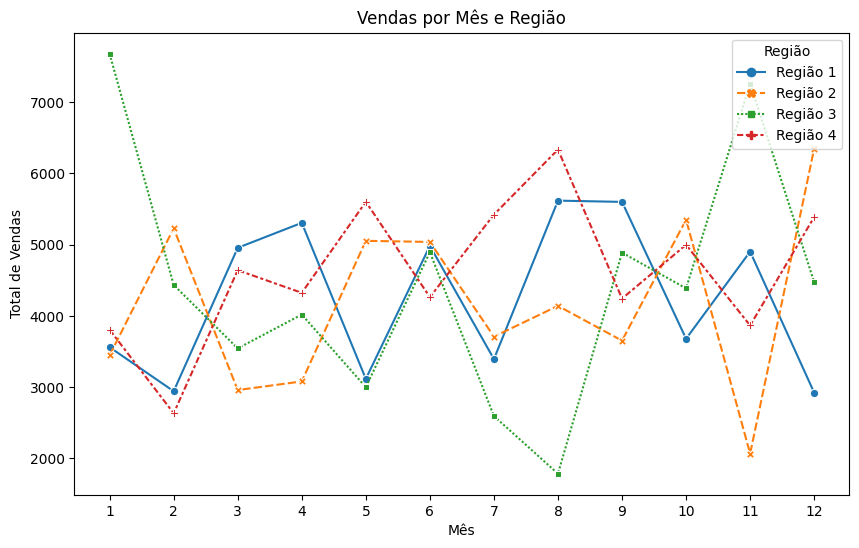

In [26]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=vendas_por_mes_regiao, markers=True)
plt.title('Vendas por Mês e Região')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(range(1, 13))
plt.legend(title='Região', loc='upper right')
plt.show()


In [27]:
"""
Análise de vendas por dias da semana

Criei mais uma coluna 'DiasSemana' que guarda os dias da semana de acordo com os dados da coluna 'Data' através do dt.dayofweek
e atribui os valores dos dias da semana para 'dias_semana'.

"""

dados['DiasSemana'] = dados['Data'].dt.dayofweek
vendas_por_dia_semana = dados.groupby('DiasSemana')['Valor'].sum()
dias_semana = ['Seg', 'Ter','Qua', 'Qui', 'Sex', 'Sab', 'Dom']


C:\Users\Darwin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Darwin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Darwin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise 

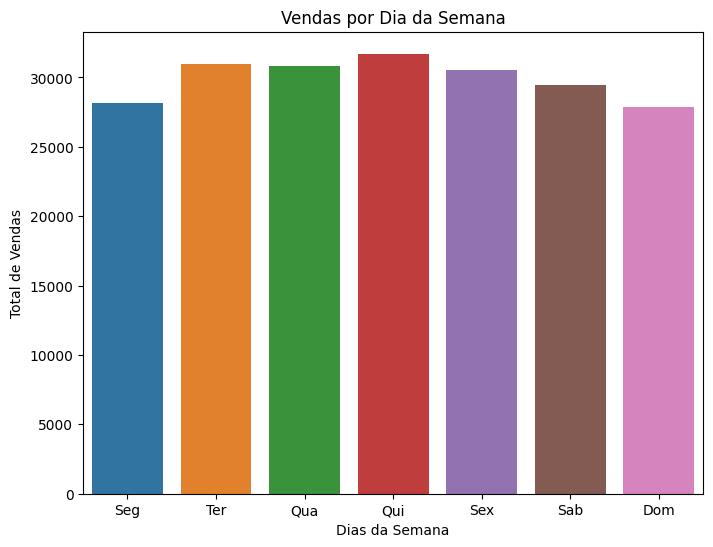

In [28]:

plt.figure(figsize=(8,6))
sns.barplot(x=dias_semana, y=vendas_por_dia_semana)
plt.title('Vendas por Dia da Semana')
plt.xlabel('Dias da Semana')
plt.ylabel('Total de Vendas')
plt.show()

C:\Users\Darwin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Darwin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Darwin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

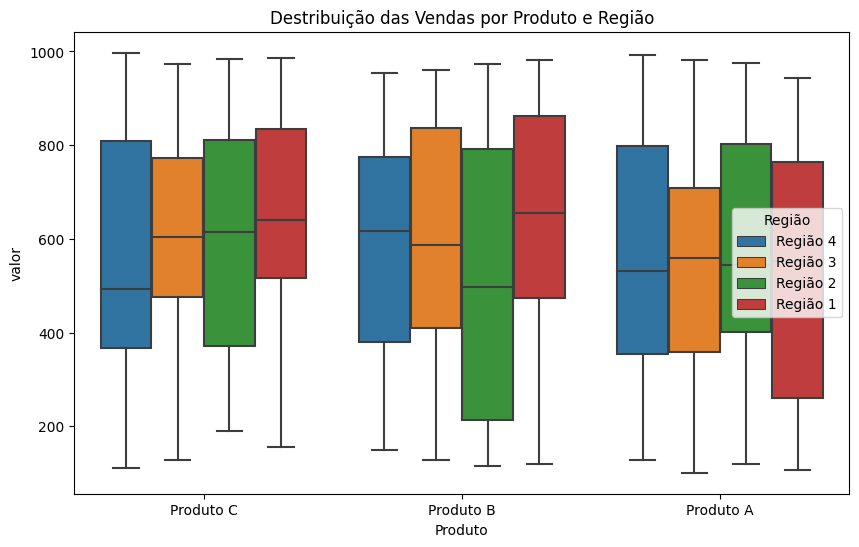

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(data=dados, x='Produto', y='Valor', hue='Região')
plt.title('Destribuição das Vendas por Produto e Região')
plt.xlabel('Produto')
plt.ylabel('valor')
plt.show()


# Insights Finais

## Vendas Gerais

A partir da análise do grafico de Vendas totais dos produtos notou-se que o Produto C se apresentou como favorito pelo publico, enquanto o Produto A teve um numero de vendas mais baixo. Isso sugere de que o produto C é popular entre os clientes, porém o produto A necessita de uma estratégia de marketing adicional com intuito de impulsionar as vendas. Já o Produto B se apresentou mediano entre as vendas do A e do C, isso infere que ele não esta com numeros de venda a baixo do comum, porem, partindo do prssuposto de que as vendas de C são ideais, o Produto B precisa ter seu desempenho futuro análisado com cautela para prevenir possiveis baixas, e estudar formas para impulsionar sua popularidade.


## Análises Temporais

Diante da análise da relação de vendas com os meses, foi-se possivel perceber um grande aumento nas vendas nos períodos do meses 9, 10, 11, 12 e 1, que correspondem respectivamente ao período da primavera e a maior parte do verão. Logo é possível concluir que o produto é mais popular em epocas mais quentes e ensolaradas. A partir dessas informações é póssível planejar estrategias de marketing sazonais e otimizar o estoque de acordo com a demanda.


É possivel também observar que no primeiro semestre, embora os meses 1 e 6 tenham desempenhos muito bons, no seu geral tem o desempenho consideravelmente menor que no segundo semestre do ano. Como já analizamos antes é de se esperar que o produto tenha desempenho melhor nas epocas de primavera e verão, contudo diante do estudo mostra-se necessário um esforço maior no engajamento dos produtos no mercado nos períodos mais frios, com intuito de melhorar as vendas.

Foi também observado a partir do grafico de relação entre vendas e dias da semana, que nos dias, Terça, Quarta e Quinta, as vendas tendem a ser maiores, e nos finais de semanas tendem a cair, o que sugere que o cliente tem como preferencia comprar no meio da semana e não muito em dias de final de semana e feriados. Portanto a partir disso é possivel desenvolver estrategias de promoção e marketing que casem com o costume de compra dos clientes.


## Análises Regionais

A partir da Análise da relação de vendas regionais, foi possivel se observar que a Região 4 se destacou porem a 1 e 2 mostraram ter o menor numero de vendas. Desta forma, é possível assumir que a Região 4 se tem o potencial grande, fazendo de si um mercado importante, exigindo foco adicional para maximizar o potencial de vendas, no entanto as regioes 1 e 2 mostram necessitar de esforços maiores para melhorar a participação no mercado.
